## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Getting the data

In [ ]:
sms = pd.read_csv('spam.csv',encoding='latin-1')

Taking a look into the data

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##Processing the data

In [ ]:
sms = sms.drop(['Unnamed: 4','Unnamed: 3','Unnamed: 2'],axis=1)

In [ ]:
sms.columns = ['label','message']

In [ ]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [ ]:
ps = PorterStemmer()
corpus = []

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def func(string):
  pre = re.sub('[^a-zA-Z]',' ',string)
  pre = pre.lower()
  pre = pre.split()

  pre = [ps.stem(word) for word in pre if word not in stopwords.words('english')]
  pre = ' '.join(pre)
  return pre

In [ ]:
sms['pre_message'] = 'NaN'
for i in range(len(sms)):
  pre = func(sms['message'][i])
  #print(pre)
  sms['pre_message'][i] = pre
  corpus.append(pre)

In [ ]:
sms['length']=sms['message'].apply(lambda x: len(x))

In [ ]:
sms.head()

,label,message,pre_message,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,155
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13bc499210>,
      dtype=object)

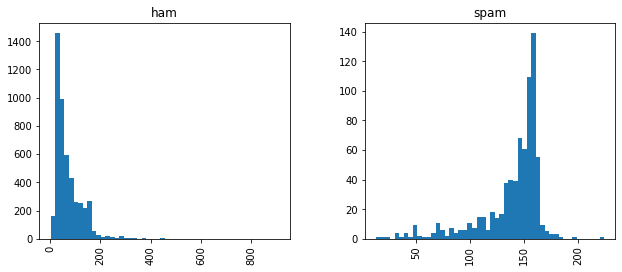

In [ ]:
sms.hist(column='length',by='label',bins=50,figsize=(10,4))

##Applying the Bag of Words approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:,1].values

### Dividing the data into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def function(label):
  if label=='ham':
    return 1
  else:
    return 0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=101)

##Training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB().fit(X_train,y_train)

In [70]:
pred = model.predict(X_test)

##Evaluating the model

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [72]:
print(f1_score(pred,y_test))
print()
print(accuracy_score(pred,y_test))
print()
print(confusion_matrix(pred,y_test))
print()
print(classification_report(pred,y_test))

0.9078613693998309

0.9755495737999103

[[3812   42]
 [  67  537]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3854
           1       0.93      0.89      0.91       604

    accuracy                           0.98      4458
   macro avg       0.96      0.94      0.95      4458
weighted avg       0.98      0.98      0.98      4458

